# Experiment Tracking

> Minimal Experiment Tracking

- toc: true
- badges: true
- comments: true
- author: Isaac Flath
- categories: [PersonalUtils]

**Background:**  I am always trying out new experiment tracking things.  Many are good, such as W&B, but there's always something I don't like about each one I try.  I want a simple, no hassle way to store, retrieve and graph values or other stuff.

**Purpose:** The purpose of this post is to show what I came up with using `shelve`.  This is in [this repo](https://github.com/Isaac-Flath/perutils), which you can pip install using `pip install git+https://github.com/isaac-flath/perutils`

>Note:  I am maintaining it for personal use without much thought for other users.  Feel free to fork, copy, etc.

The repo also includes some [nb utils](https://isaac-flath.github.io/fastblog/nbdev/2021/03/30/NbdevMinimum.html) to move py -> notebooks and notebooks -> py as well as clearing outputs and other things.  It also includes tabular functions I use, and will probably include other things in the future.  One Disclaimer: 


In [1]:
from perutils.tracking import *
import shelve

# Shelve

This solution is based on the shelve library.  Shelve is database that is a dictionary.  So if you imagine just storing a dictionary in a file, that's what it is.  There's some really cool things about shelve:
+ You can add to it with the same syntax as dictionaries, so not much new syntax or api to learn or thing about
+ It's stored in a file but it's all pickled so read/write pretty fast and is stored on disk
+ Anything that can be pickled can be stored as a value.  In python, that is most things.
+ It's nosql and you don't need to have a set schema from experiment to experiment.  Add an extra comments field, or start/stop tracking a stat.  Add a key and store a pickled function you used that was important to this experiment.  No problem, and no need to worry about it!

Let's jump to it!

# Editing

If we use the append function, it will append to the db or create one if it doesn't exist.  For example to put our first experiment in our db this is what that would look like!

>Note:  I like adding a dict at a time, but you can just add individual keys direct to the db just as easily.

In [2]:
fname = 'test.shelve'

In [3]:
exp1 = {'name':'resnet18',
               'epoch_loss':[8.,4.,2.],
               'epoch_accuracy':[.90,.94,.96]}
append(fname,exp1,key='exp')

And we can query to see that it's in our db like this.  You will notice by default it puts it in the `exp` key to be accessed with `d['exp']`.  You can have multiple keys if you'd like, or change the name using an argument in the append function.  The convention this tool assumes is that inside each key (ie `exp`) is a list of dictionaries with each dictionary representing an experiment.

In [4]:
with shelve.open(fname) as d: print(d['exp'])

[{'name': 'resnet18', 'epoch_loss': [8.0, 4.0, 2.0], 'epoch_accuracy': [0.9, 0.94, 0.96]}]


# Querying

Now let's look at some other options for querying that I built to make my life easier.  Let's start by appending a couple more experiments or runs to our db.  I'll make sure they don't all have the same number of values being tracked so we can show that it works in a nosql like way.

In [5]:
exp2 = {'name':'resnet34',
               'notes':f'test note 2',
               'epoch_loss':[6.,3.,1.],
               'epoch_accuracy':[.91,.95,.97],
               'batch_loss':[10.,8.,6.1,4.5,3.2,2.5]
            }
exp3 = {'name':'resnet50',
               'notes':f'test note 3',
               'epoch_loss':[5.,2.,.5],
               'epoch_accuracy':[.93,.97,.99],
               'batch_loss':[9.,7.,5.1,3.5,2.2,1.5]
            }
append(fname,exp2,key='exp')
append(fname,exp3,key='exp')

If we want to see what all our keys are to choose from we can query that with `print_keys`.  You will notice that not every experiment had all of these (the first one had only 3 keys).

In [6]:
print_keys(fname,key='exp')

['name', 'notes', 'epoch_loss', 'epoch_accuracy', 'batch_loss']


I can pull some of these stats quick with `get_stats`.  -1 signifies the last dictionary in the list.  -2 would signify second to last.  Just normal list indexing.

In [7]:
a,b,c = get_stats(fname,-1,['epoch_loss','epoch_accuracy','batch_loss'],display=True,key='exp')

d[exp][-1][epoch_loss]: [5.0, 2.0, 0.5]
d[exp][-1][epoch_accuracy]: [0.93, 0.97, 0.99]
d[exp][-1][batch_loss]: [9.0, 7.0, 5.1, 3.5, 2.2, 1.5]


If I want to see which experiment is the best according to some stat, `print_best` is your friend.

In [8]:
print_best(fname,'epoch_loss',best='min',key='exp')
print_best(fname,'epoch_accuracy',best='max',key='exp')

epoch_loss min value = 0.5 | best idx = -1
epoch_accuracy max value = 0.99 | best idx = -1


# Graphing

Graphing is just as easy.  Let's graph a couple stats, including one that wasn't included in the first experiment to show that it works just fine.  Simply provide indexes of experiments to compare (0,1,2 would be first 3 exps, -1,-2,-3 signifies the most recent 3).  By default it pulls the `name` key to label the lines.

Unable to plot batch_loss for resnet18


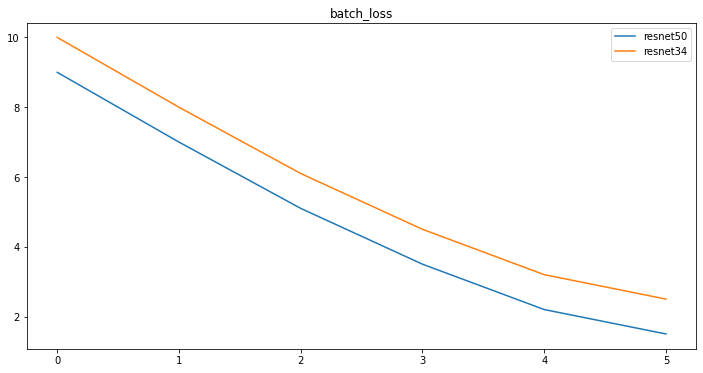

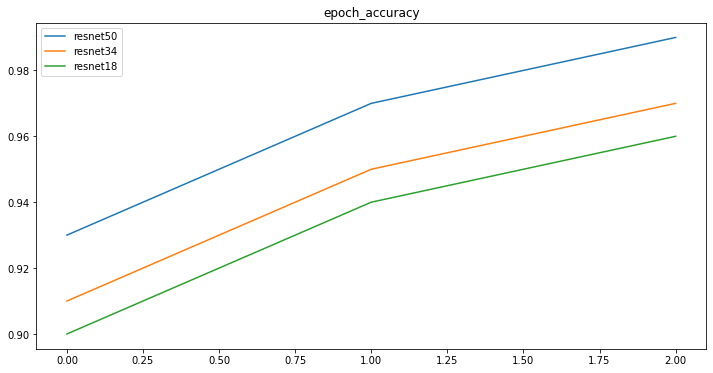

In [9]:
graph_stats(fname,['batch_loss','epoch_accuracy'],idxs=[-1,-2,-3],key='exp')